In [34]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

df = pd.read_csv('dados_tratados.csv')
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed,65.6,593.30,2.186667
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed,59.9,542.40,1.996667
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic,73.9,280.85,2.463333
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic,98.0,1237.85,3.266667
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed,83.9,267.40,2.796667


In [7]:
#remover colunas irrelevantes
df = df.drop('Contas_Diarias', axis=1)
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed,65.6,593.30
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed,59.9,542.40
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic,73.9,280.85
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic,98.0,1237.85
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed,83.9,267.40


In [8]:
#colunas categoricas
cols_categoricas = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

#aplicar encoding
df_encoded = pd.get_dummies(df, columns=cols_categoricas, drop_first=True)
df_encoded.head()


,tenure,Charges.Monthly,Charges.Total,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit Card,PaymentMethod_Electronic,PaymentMethod_Mailed,Churn_Yes
0,9,65.6,593.30,False,False,True,True,True,False,False,...,True,True,False,True,False,True,False,False,True,False
1,9,59.9,542.40,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
2,4,73.9,280.85,True,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,True
3,13,98.0,1237.85,True,True,True,False,True,False,True,...,False,True,True,False,False,True,False,True,False,True
4,3,83.9,267.40,False,True,True,False,True,False,True,...,True,True,False,False,False,True,False,False,True,True


In [11]:
#proporção de clientes que evadiram em relação aos que permaneceram ativos
df_encoded['Churn_Yes'].value_counts(normalize=True) * 100

,proportion
Churn_Yes,
False,73.463013
True,26.536987


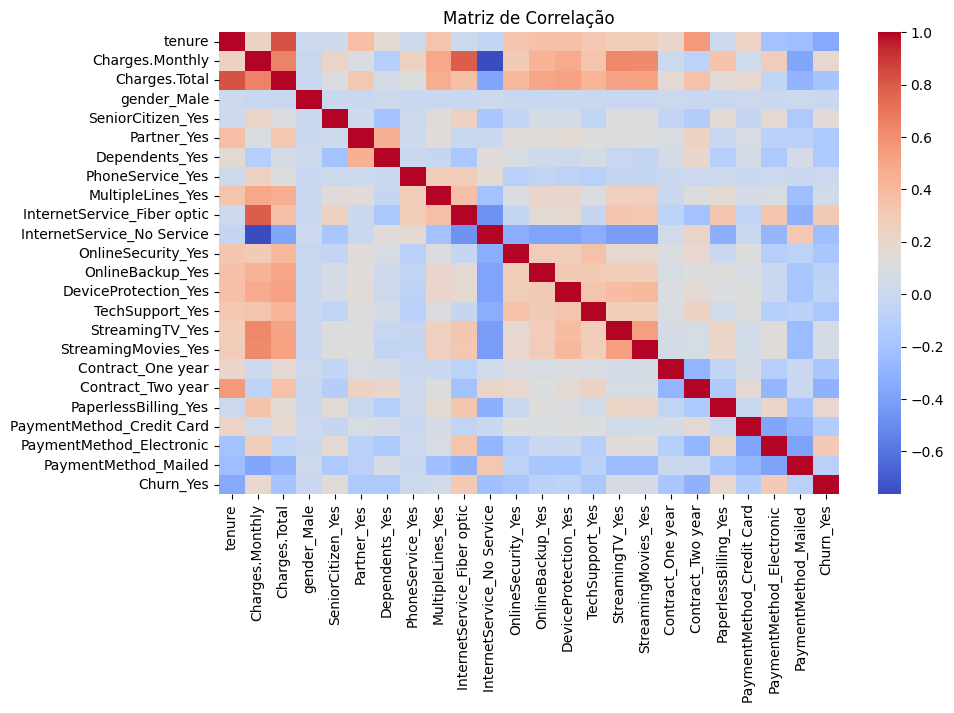

Churn_Yes                      1.000000
InternetService_Fiber optic    0.308020
PaymentMethod_Electronic       0.301919
Charges.Monthly                0.193356
PaperlessBilling_Yes           0.191825
SeniorCitizen_Yes              0.150889
StreamingTV_Yes                0.063228
StreamingMovies_Yes            0.061382
MultipleLines_Yes              0.040102
PhoneService_Yes               0.011942
Name: Churn_Yes, dtype: float64
PaymentMethod_Credit Card    -0.134302
Partner_Yes                  -0.150448
Dependents_Yes               -0.164221
TechSupport_Yes              -0.164674
OnlineSecurity_Yes           -0.171226
Contract_One year            -0.177820
Charges.Total                -0.198324
InternetService_No Service   -0.227890
Contract_Two year            -0.302253
tenure                       -0.352229
Name: Churn_Yes, dtype: float64


In [16]:
#matriz de correlação
matriz_corr = df_encoded.corr()

#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, cmap="coolwarm", annot=False, cbar=True)
plt.title("Matriz de Correlação")
plt.show()

#correlação de todas as variáveis com a evasão
corr_com_churn = matriz_corr["Churn_Yes"].sort_values(ascending=False)
print(corr_com_churn.head(10))
print(corr_com_churn.tail(10))


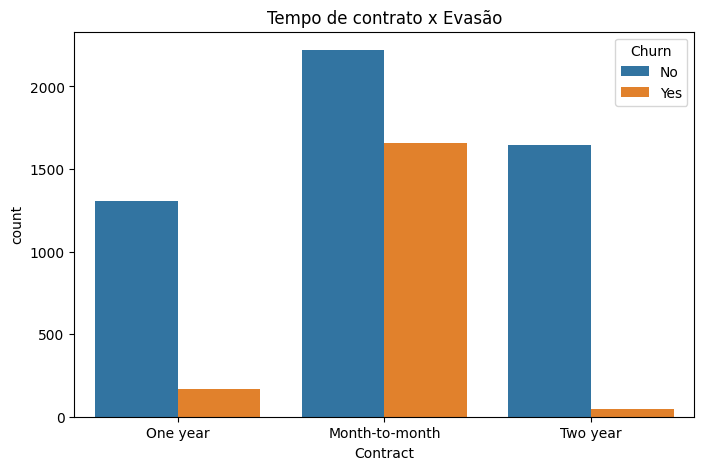

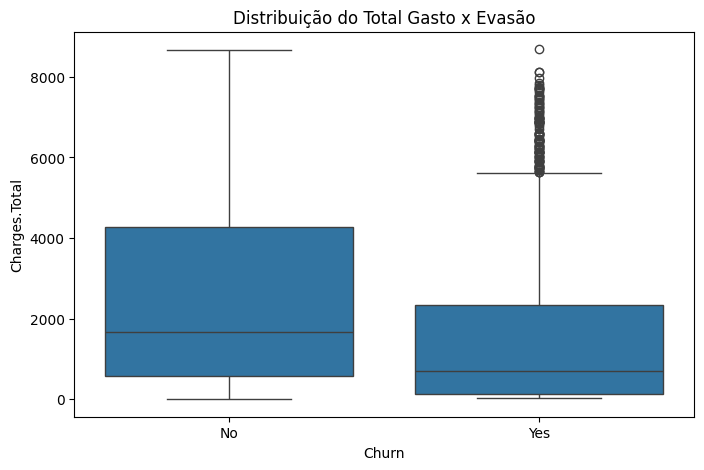

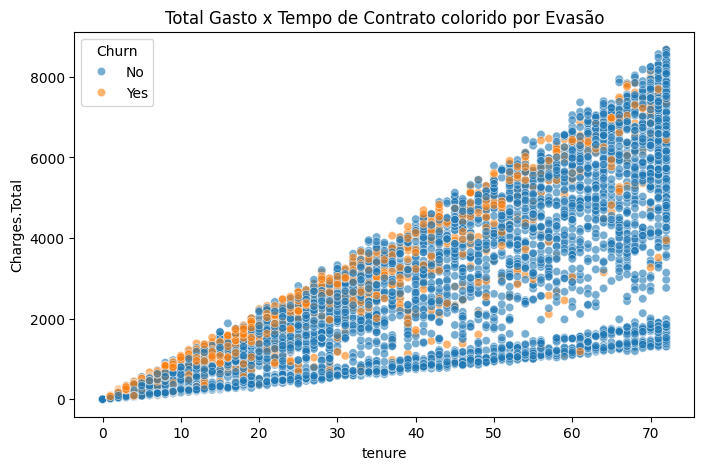

In [19]:
#tempo de contrato x evasão
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Tempo de contrato x Evasão")
plt.show()
print("\n")

#total gasto x evasão - boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Churn", y="Charges.Total")
plt.title("Distribuição do Total Gasto x Evasão")
plt.show()
print("\n")

#total gasto x Evasão - scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="tenure", y="Charges.Total", hue="Churn", alpha=0.6)
plt.title("Total Gasto x Tempo de Contrato colorido por Evasão")
plt.show()

In [21]:
#definir x (variaveis predatoras) e y (variavies alvo)
X = df_encoded.drop("Churn_Yes", axis=1)
y = df_encoded["Churn_Yes"]

#dividir 70% treino / 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Conjunto de treino:", X_train.shape)
print("Conjunto de teste:", X_test.shape)

Conjunto de treino: (4930, 23)
Conjunto de teste: (2113, 23)


In [24]:
#árvore de decisão
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
#justificativa: modelo interpretável, não precisa de normalização e identifica interações entre variáveis

#random forest
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=8)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#justificativa: Justificativa: reduz overfitting, costuma ter desempenho superior e fornece importância das variáveis.


Resultados - Árvore de Decisão
--- Teste ---
Acurácia: 0.7846663511594889
Precisão: 0.5898305084745763
Recall: 0.6203208556149733
F1-Score: 0.6046915725456126

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1552
        True       0.59      0.62      0.60       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.73      2113
weighted avg       0.79      0.78      0.79      2113


--- Treino ---
Acurácia: 0.8010141987829614
Precisão: 0.6217423678332092
Recall: 0.6383792048929664
F1-Score: 0.6299509619011694

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

       False       0.87      0.86      0.86      3622
        True       0.62      0.64      0.63      1308

    accuracy                           0.80      4930
   macro avg       0.74      0.75      0.75      4930
weighted avg       0.80      0.80   

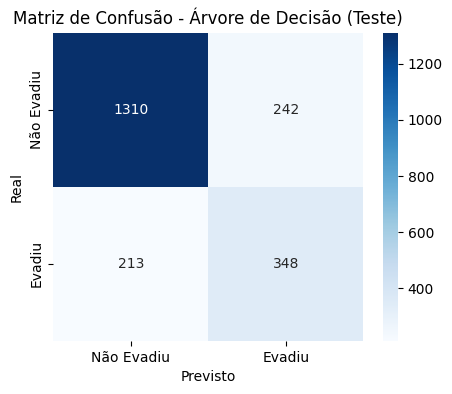


Resultados - Random Forest
--- Teste ---
Acurácia: 0.7946048272598202
Precisão: 0.6420581655480985
Recall: 0.5115864527629234
F1-Score: 0.5694444444444444

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1552
        True       0.64      0.51      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.79      2113


--- Treino ---
Acurácia: 0.8397565922920892
Precisão: 0.7584830339321357
Recall: 0.581039755351682
F1-Score: 0.658008658008658

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

       False       0.86      0.93      0.90      3622
        True       0.76      0.58      0.66      1308

    accuracy                           0.84      4930
   macro avg       0.81      0.76      0.78      4930
weighted avg       0.83      0.84      0.8

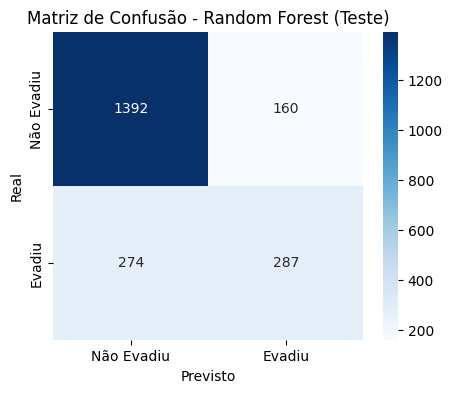

In [27]:
#avaliação dos modelos
def avaliar_modelo(nome, y_test, y_pred, y_train, y_pred_train):
    print(f"\nResultados - {nome}")
    print("--- Teste ---")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Precisão:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("\nRelatório de Classificação (Teste):")
    print(classification_report(y_test, y_pred))

    print("\n--- Treino ---")
    print("Acurácia:", accuracy_score(y_train, y_pred_train))
    print("Precisão:", precision_score(y_train, y_pred_train))
    print("Recall:", recall_score(y_train, y_pred_train))
    print("F1-Score:", f1_score(y_train, y_pred_train))
    print("\nRelatório de Classificação (Treino):")
    print(classification_report(y_train, y_pred_train))


    #matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Evadiu", "Evadiu"], yticklabels=["Não Evadiu", "Evadiu"])
    plt.title(f"Matriz de Confusão - {nome} (Teste)")
    plt.ylabel("Real")
    plt.xlabel("Previsto")
    plt.show()

# Re-predict on the training set
y_pred_tree_train = tree.predict(X_train)
y_pred_rf_train = rf.predict(X_train)


avaliar_modelo("Árvore de Decisão", y_test, y_pred_tree, y_train, y_pred_tree_train)
avaliar_modelo("Random Forest", y_test, y_pred_rf, y_train, y_pred_rf_train)

O objetivo é prever os clientes que irão evadir, logo o modelo Random Forest é o mais indicado, pois obteve maior precisão.

Houve overfitting no modelo de Árvore de Decisão, uma métrica de aproximadamente 2-3% maior no treino. No modelo Random Forest, o overfitting foi maior, ou seja, o modelo está performando melhor nos dados de treino.

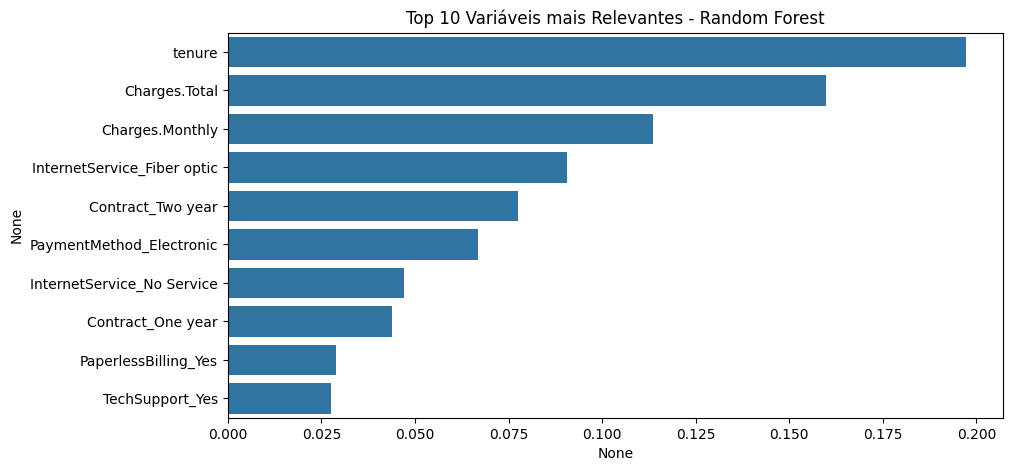

In [32]:
importances = rf.feature_importances_
features = X_train.columns
feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10])
plt.title("Top 10 Variáveis mais Relevantes - Random Forest")
plt.show()


In [36]:
#regressão logística
log_reg = LogisticRegression(random_state=42, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#SVM
svm = SVC(kernel='linear', random_state=42, probability=True, max_iter=10000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


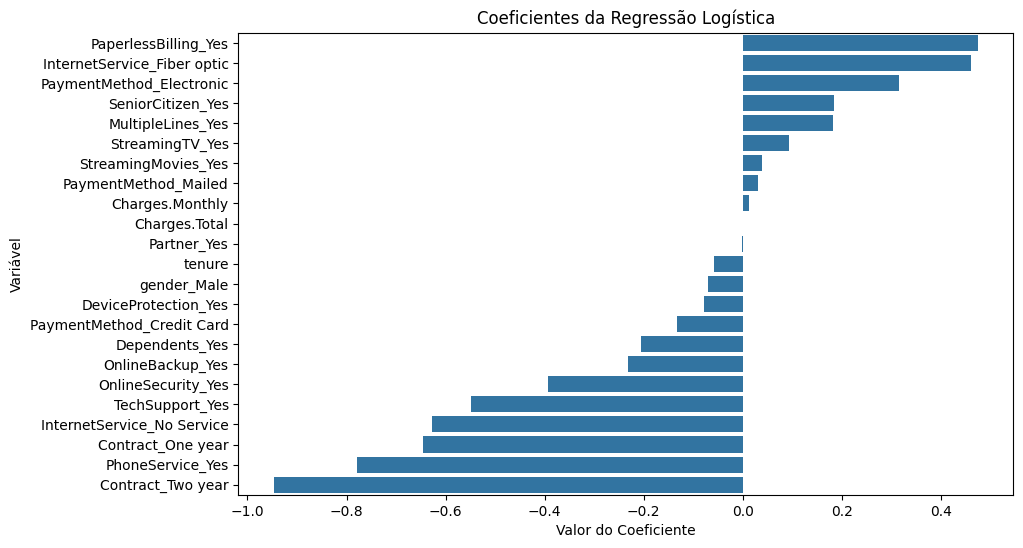


Top 10 coeficientes positivos (aumentam a probabilidade de evasão):
PaperlessBilling_Yes           0.475213
InternetService_Fiber optic    0.460008
PaymentMethod_Electronic       0.316223
SeniorCitizen_Yes              0.183511
MultipleLines_Yes              0.182137
StreamingTV_Yes                0.092989
StreamingMovies_Yes            0.039600
PaymentMethod_Mailed           0.029825
Charges.Monthly                0.011570
Charges.Total                  0.000270
dtype: float64

Top 10 coeficientes negativos (diminuem a probabilidade de evasão):
DeviceProtection_Yes         -0.078088
PaymentMethod_Credit Card    -0.133717
Dependents_Yes               -0.206454
OnlineBackup_Yes             -0.232719
OnlineSecurity_Yes           -0.393722
TechSupport_Yes              -0.549378
InternetService_No Service   -0.627183
Contract_One year            -0.645409
PhoneService_Yes             -0.779453
Contract_Two year            -0.947184
dtype: float64


In [37]:
#analise dos coeficientes da regressão logística
coefficients = log_reg.coef_[0]
feature_names = X_train.columns

coef_series = pd.Series(coefficients, index=feature_names)
sorted_coef = coef_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_coef, y=sorted_coef.index)
plt.title("Coeficientes da Regressão Logística")
plt.xlabel("Valor do Coeficiente")
plt.ylabel("Variável")
plt.show()

print("\nTop 10 coeficientes positivos (aumentam a probabilidade de evasão):")
print(sorted_coef.head(10))

print("\nTop 10 coeficientes negativos (diminuem a probabilidade de evasão):")
print(sorted_coef.tail(10))

##Introdução
Este relatório identifica os principais fatores que contribuem para a evasão de clientes e propõe estratégias de retenção com base nos modelos de Machine Learning.

###Modelos e Desempenho

*   **Modelos Avaliados:** Árvore de Decisão e Random Forest.
*   **Desempenho:** O Random Forest teve a maior precisão, enquanto a Árvore de Decisão teve o maior recall. Random Forest apresentou overfitting mais notável, porém, é o mais indicado, pois prevê a evasão dos clientes.

###Principais Fatores de Evasão

Os modelos convergiram em destacar a importância de:

*   **Tempo de Contrato:** Clientes mais novos evadem mais.
*   **Gastos:** Especialmente clientes com fibra óptica e altos gastos mensais.
*   **Serviço de Internet :** Clientes com fibra óptica evadem mais.
*   **Tipo de Contrato:** Contratos mensais têm maior evasão.
*   **Método de Pagamento:** Pagamento eletrônico associado a maior evasão.
*   **Serviços Adicionais:** Falta de serviços como segurança online, suporte técnico e backup aumenta a evasão.

###Conclusão

Com base nos fatores, as estratégias incluem:

1.  Foco em novos clientes nos primeiros meses.
2.  Oferecerecimento de benefícios para migração para contratos de 1 ou 2 anos.
3.   Investigar e resolver problemas de qualidade/custo nos serviços de fibra ótica.
4.  Incentivar a adesão a serviços adicionais.
5.  Investigar causas de evasão e melhorar a experiência.
6.  Acompanhar indicadores e ajustar estratégias.